In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import linear_model




delivery_data=pd.read_csv("/gdrive/My Drive/deliveries.csv")
match_data=pd.read_csv("/gdrive/My Drive/matches.csv")

delivery_data.head()
match_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [0]:
player_team="Royal Challengers Bangalore"
name='V Kohli'
batsman_data=delivery_data[delivery_data.batsman==name]
teams=pd.DataFrame(index=match_data.team1.unique())
teams=teams.drop('Royal Challengers Bangalore')
teams

""
Kolkata Knight Riders
Chennai Super Kings
Rajasthan Royals
Mumbai Indians
Deccan Chargers
Kings XI Punjab
Delhi Daredevils
Kochi Tuskers Kerala
Pune Warriors
Sunrisers Hyderabad


In [0]:
data=match_data[match_data.team1==player_team]
batting_first=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team2==team)].id
        runs=0
        balls=0
        for match in matches:
            t=batsman_data[batsman_data.match_id==match].batsman_runs.sum()
            runs=runs+t
            balls=balls+len(batsman_data[(batsman_data.match_id==match)&(batsman_data.wide_runs==0)&(batsman_data.noball_runs==0)])
        batting_first=batting_first+[[team,venue,1,balls,runs]]
data=match_data[match_data.team2==player_team]
batting_second=list()
for team in teams.index:
    for venue in data.venue.unique():
        matches=data[(data.venue==venue)&(data.team1==team)].id
        runs=0
        balls=0
        for match in matches:
            t=batsman_data[batsman_data.match_id==match].batsman_runs.sum()
            runs=runs+t
            balls=balls+len(batsman_data[(batsman_data.match_id==match)&(batsman_data.wide_runs==0)&(batsman_data.noball_runs==0)])
        batting_second=batting_second+[[team,venue,0,balls,runs]]
    batting_first=batting_first+batting_second
df=pd.DataFrame(data=batting_first,columns=['team','venue','batting_first','balls','runs'])

df=df[df.runs!=0]
df.head()
        


,team,venue,batting_first,balls,runs
0,Kolkata Knight Riders,M Chinnaswamy Stadium,1,44,52
7,Kolkata Knight Riders,Eden Gardens,1,5,2
13,Kolkata Knight Riders,JSCA International Stadium Complex,1,14,17
19,Chennai Super Kings,M Chinnaswamy Stadium,1,94,153
21,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",1,132,159


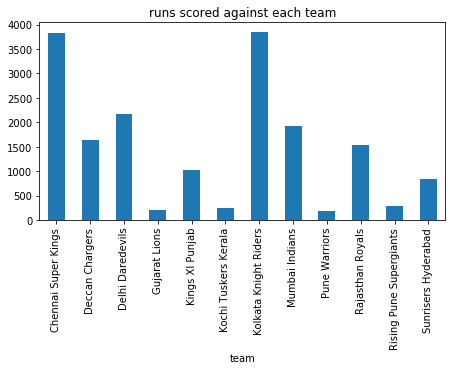

In [0]:
fig = plt.figure(figsize=(16,8))  
fig.add_subplot(221)
df.groupby('team').runs.sum().plot(kind='bar',title='runs scored against each team')



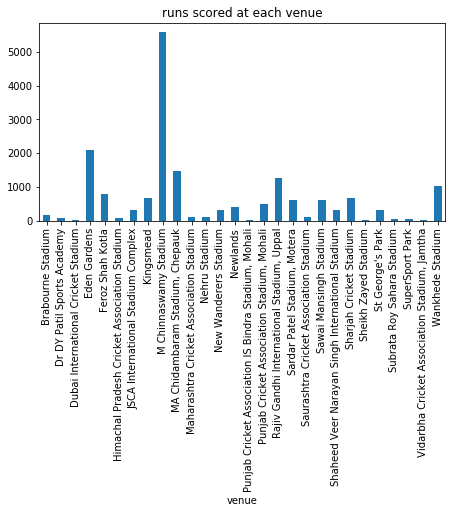

In [0]:
fig = plt.figure(figsize=(16,8))  
ax=fig.add_subplot(221)
df.groupby('venue').runs.sum().plot(kind='bar',title='runs scored at each venue')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

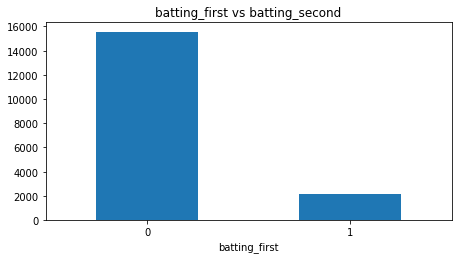

In [0]:
fig = plt.figure(figsize=(16,8))  
fig.add_subplot(221)

df.groupby('batting_first').runs.sum().plot(kind='bar',title='batting_first vs batting_second')
plt.xticks(rotation=0)


In [0]:
from sklearn.model_selection import train_test_split
processed_df = df.copy()
le = preprocessing.LabelEncoder()
processed_df.team = le.fit_transform(processed_df.team)
processed_df.venue = le.fit_transform(processed_df.venue)

X = processed_df.drop(['runs'], axis=1).values
y = processed_df['runs'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [0]:


from keras.models import Sequential
from keras.layers import Dense
n_cols = X_train.shape[1]

model_mc = Sequential()


model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))
model_mc.compile(optimizer='adam', loss='mean_squared_error')



model_mc.fit(X_train, y_train, validation_split=0.2, epochs=30)








Train on 210 samples, validate on 53 samples
Epoch 1/30





210/210 [==============================] - 1s 3ms/step - loss: 3663.4221 - val_loss: 890.2825
Epoch 2/30
210/210 [==============================] - 0s 120us/step - loss: 483.1044 - val_loss: 452.2497
Epoch 3/30
210/210 [==============================] - 0s 117us/step - loss: 439.4929 - val_loss: 120.6057
Epoch 4/30
210/210 [==============================] - 0s 105us/step - loss: 137.6642 - val_loss: 169.1436
Epoch 5/30
210/210 [==============================] - 0s 105us/step - loss: 134.8133 - val_loss: 89.6664
Epoch 6/30
210/210 [==============================] - 0s 97us/step - loss: 91.5299 - val_loss: 90.5082
Epoch 7/30
210/210 [==============================] - 0s 92us/step - loss: 73.4823 - val_loss: 90.7428
Epoch 8/30
210/210 [==============================] - 0s 112us/step - loss: 82.3838 - val_loss: 80.8401
Epoch 9/30
210/210 [==============================] - 0s 101us/step - loss: 81.7496 - val_loss: 80.9550
Epoch

In [0]:
y_1= model_mc.predict(X_test)
print(metrics.mean_squared_error(y_test,y_1))

104.84192220104603
